121
chest pain : 4
trouble sleeping : 3
weight loss : 2
difficult breathing : 4
diarrhea : 5
vomitting : 4
heartburn : 4
low temperature : 5
rapid heart beat : 2
headache : 11
fussiness : 4
sore throat : 3
sweating : 3
dizziness : 8
fever : 6
thirst : 3
tiredness : 4
abdominal pain : 11
nasal congestion : 2
cough : 5
high temperature : 3


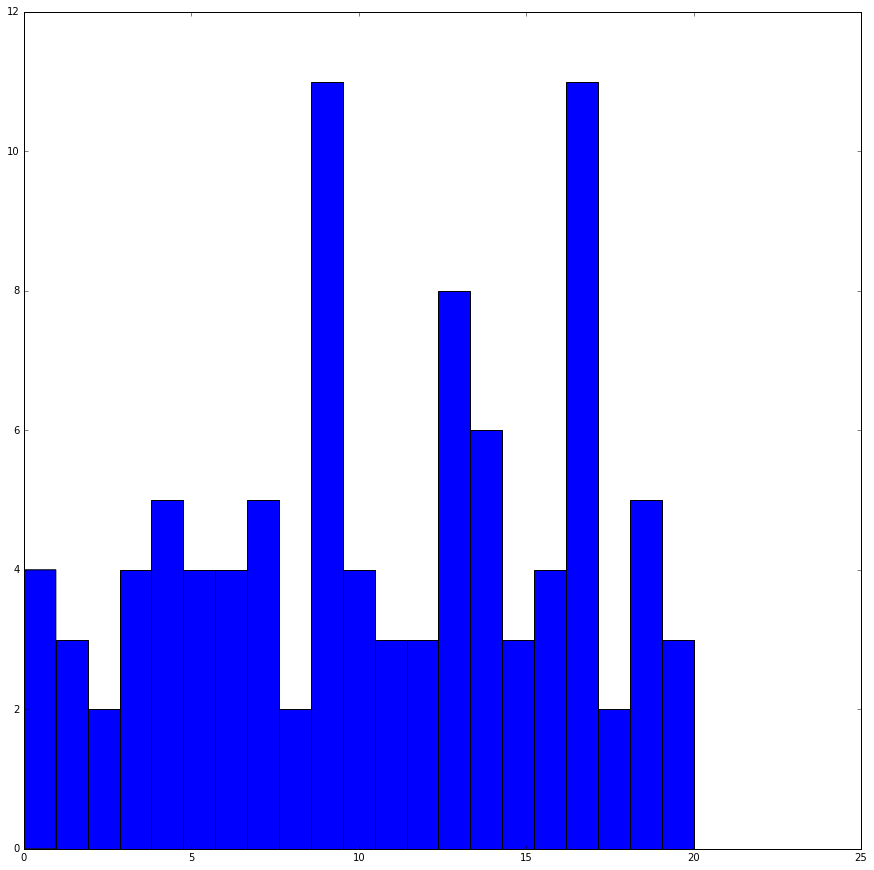

In [36]:
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['image.interpolation'] = 'nearest'
from sklearn import svm
import random
import numpy as np

def vectorize(indexes, sentence):
    b = [0]*len(indexes)
    for w in sentence.split():
        b[indexes[w]] += 1

    return b

with open('data.txt', 'r') as f:
	lines = [l.split(':') for l in f]

classes = {e[0] for e in lines}
words = {w for e in lines for w in e[1].rstrip().split()}

ind_Y = {key:ind for ind,key in enumerate(classes)}
inv_ind_Y = {key:ind for key,ind in enumerate(classes)}
ind_X = {key:ind for ind,key in enumerate(words)}


print(len(words))
count_classes = []
for c in lines:
        count_classes.append(ind_Y[c[0]])
for i in classes:
    print("%s: %d" % (i, count_classes.count(ind_Y[i])))

_ = plt.hist(count_classes, 21)

Y = [ind_Y[l[0]] for l in lines]
X = [vectorize(ind_X, l[1]) for l in lines]

shuffled = zip(X, Y)
random.shuffle(shuffled)
training = shuffled[len(shuffled)//10:]
test = shuffled[:len(shuffled)//10]
x_test, y_test = zip(*test)
x_training, y_training = zip(*training)

In [2]:
print ind_Y

{'chest pain ': 0, 'trouble sleeping ': 1, 'weight loss ': 2, 'difficult breathing ': 3, 'diarrhea ': 4, 'sweating ': 12, 'cough ': 19, 'high temperature ': 20, 'headache ': 9, 'dizziness ': 13, 'rapid heart beat ': 8, 'sore throat ': 11, 'vomitting ': 5, 'nasal congestion ': 18, 'heartburn ': 6, 'fever ': 14, 'tiredness ': 16, 'abdominal pain ': 17, 'fussiness ': 10, 'low temperature ': 7, 'thirst ': 15}


In [3]:
print inv_ind_Y

{0: 'chest pain ', 1: 'trouble sleeping ', 2: 'weight loss ', 3: 'difficult breathing ', 4: 'diarrhea ', 5: 'vomitting ', 6: 'heartburn ', 7: 'low temperature ', 8: 'rapid heart beat ', 9: 'headache ', 10: 'fussiness ', 11: 'sore throat ', 12: 'sweating ', 13: 'dizziness ', 14: 'fever ', 15: 'thirst ', 16: 'tiredness ', 17: 'abdominal pain ', 18: 'nasal congestion ', 19: 'cough ', 20: 'high temperature '}


In [4]:
print Y 

[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 0, 0, 0, 0, 19, 19, 19, 19, 19, 4, 4, 4, 4, 4, 3, 3, 3, 3, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 20, 20, 20, 7, 7, 7, 7, 7, 18, 18, 8, 8, 11, 11, 11, 12, 12, 12, 15, 15, 15, 16, 16, 16, 16, 1, 1, 1, 5, 5, 5, 5, 2, 2, 6, 6, 6, 6]


In [5]:
print X

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0

In [7]:
print x_test
print y_test

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [8]:
print x_training 
print y_training

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [9]:
clf = svm.SVC()
clf.fit(x_training, y_training)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
mat = np.zeros((len(inv_ind_Y),len(inv_ind_Y)))

In [15]:
for x,y in zip(x_training, y_training):
    truth = inv_ind_Y[y]
    prediction = inv_ind_Y[clf.predict(x)[0]]
    print('{0} = {1}'.format(prediction, truth)) 
    mat[ind_Y[truth],ind_Y[prediction]] += 1

abdominal pain  = dizziness 
abdominal pain  = tiredness 
abdominal pain  = fever 
abdominal pain  = low temperature 
abdominal pain  = dizziness 
abdominal pain  = fever 
abdominal pain  = abdominal pain 
abdominal pain  = chest pain 
abdominal pain  = sweating 
abdominal pain  = abdominal pain 
abdominal pain  = high temperature 
abdominal pain  = sore throat 
abdominal pain  = diarrhea 
abdominal pain  = cough 
abdominal pain  = sore throat 
abdominal pain  = cough 
abdominal pain  = headache 
abdominal pain  = abdominal pain 
abdominal pain  = high temperature 
abdominal pain  = headache 
abdominal pain  = high temperature 
abdominal pain  = difficult breathing 
abdominal pain  = abdominal pain 
abdominal pain  = nasal congestion 
abdominal pain  = sore throat 
abdominal pain  = dizziness 
abdominal pain  = tiredness 
abdominal pain  = cough 
abdominal pain  = fever 
abdominal pain  = abdominal pain 
abdominal pain  = low temperature 
abdominal pain  = dizziness 
abdominal pain  = 

/usr/lib64/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/lib64/python2.

In [17]:
def show_matrix(matrix, title='No title', c_label=""):
    plt.figure()
    plt.imshow(matrix, cmap='YlGnBu', interpolation='nearest')
    c = plt.colorbar()
    c.set_label(c_label)
    l = matrix.shape[0]
    plt.xticks(range(l))
    plt.xlabel("Ground truth")
    _ = plt.yticks(range(l))
    plt.ylabel("Predictions")
    plt.title(title)

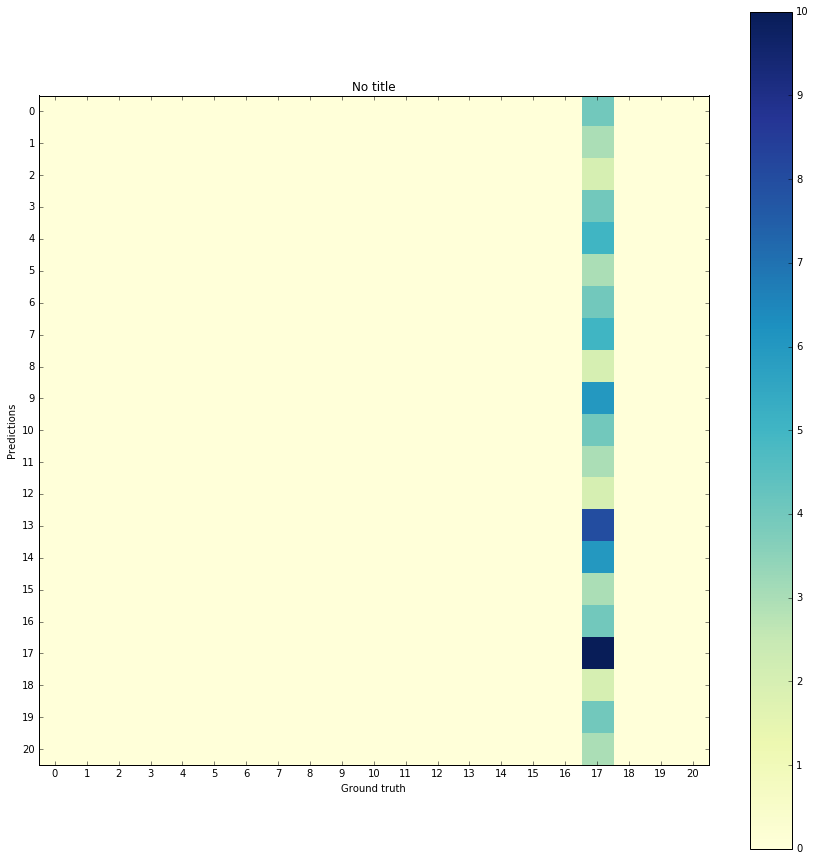

In [37]:
show_matrix(mat)